<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Projetos de Análise de Dados com Linguagem Python</font>
# <font color='blue'>Projeto 9 - Relatórios de Análise Estatística com Linguagem Python</font>

## Pacotes Python Usados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando e Compreendendo o Conjunto de Dados

Veja o Dicionário de Dados no Capítulo 16 do curso.

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [5]:
# Shape
df_dsa.shape

(500, 8)

In [6]:
# Visualiza as 5 primeiras linhas
df_dsa.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


Tipos de Medicamento:

**Placebo**: Um placebo é uma substância sem qualquer efeito terapêutico, usada como controle em experimentos. Ao administrar um placebo a um grupo de camundongos, os pesquisadores podem estabelecer uma linha de base para comparar os efeitos dos medicamentos reais. Isso ajuda a determinar se as mudanças observadas nos grupos tratados são devido ao medicamento em teste ou outros fatores externos.

**Ramicane e Capomulin**: São exemplos de medicamentos reais usados frequentemente em estudos para tratar ou controlar o crescimento de tumores. Esses medicamentos podem ter mecanismos de ação específicos, como inibir o crescimento de células cancerígenas ou reduzir a inflamação que promove o crescimento do tumor.

**Infubinol**: Outro tipo de medicamento que pode ser usado em estudos para avaliar sua eficácia na prevenção ou redução do crescimento de tumores em camundongos. Como os demais, sua inclusão no estudo visa testar sua eficácia e potenciais efeitos colaterais.

In [7]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Mouse             500 non-null    object 
 1   Medicamento          500 non-null    object 
 2   Sexo                 500 non-null    object 
 3   Idade_Meses          500 non-null    int64  
 4   Peso (g)             500 non-null    int64  
 5   Timepoint            500 non-null    int64  
 6   Tumor Volume (mm3)   500 non-null    float64
 7   Sitios Metastáticos  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


## Limpeza Inicial dos Dados

In [8]:
# Nomes das colunas
df_dsa.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [9]:
# Valores únicos para id do mouse
df_dsa["ID Mouse"].nunique()

100

In [10]:
# Verifica valores ausentes
df_dsa.isna().any()

ID Mouse               False
Medicamento            False
Sexo                   False
Idade_Meses            False
Peso (g)               False
Timepoint              False
Tumor Volume (mm3)     False
Sitios Metastáticos    False
dtype: bool

In [11]:
# Extrai duplicatas na combinação "ID Mouse" e "Timepoint" (se houver)
duplicate_ID = df_dsa.loc[df_dsa.duplicated(subset = ["ID Mouse", "Timepoint"]), "ID Mouse"].unique()

In [12]:
# Se houver duplicata, removemos
df_dsa_final = df_dsa[df_dsa["ID Mouse"].isin(duplicate_ID) == False]

In [13]:
# Shape
df_dsa.shape

(500, 8)

In [14]:
# Visualiza as 5 primeiras linhas
df_dsa_final.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


## Sumário Estatístico

In [15]:
# Nomes das colunas
df_dsa_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [16]:
# Agrupamento pelo Medicamento e filtro pela variável "Tumor Volume (mm3)"
df_dsa_final_agrupado = df_dsa_final.groupby("Medicamento")["Tumor Volume (mm3)"]

In [17]:
# Agora calculamos as estatísticas da variável "Tumor Volume (mm3)"
media = df_dsa_final_agrupado.mean()
mediana = df_dsa_final_agrupado.median()
variancia = df_dsa_final_agrupado.var()
desvio_padrao = df_dsa_final_agrupado.std()
sem = df_dsa_final_agrupado.sem()

In [18]:
# Cria o dataframe de sumário
df_sumario_estatistico = pd.DataFrame({'Média': media, 
                                       'Mediana': mediana, 
                                       'Variância': variancia, 
                                       'Desvio Padrão': desvio_padrao,
                                       'SEM': sem})

In [19]:
df_sumario_estatistico

,Média,Mediana,Variância,Desvio Padrão,SEM
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


In [20]:
# Esta seria uma alternativa para agrupamento e cálculo das estatísticas
sumario_agregado = df_dsa_final_agrupado.agg(["mean", "median", "var", "std", "sem"])

As funções usadas aqui são:

- mean: Calcula a média aritmética dos dados.
- median: Determina o valor mediano dos dados.
- var: Calcula a variância dos dados, uma medida de dispersão que mostra quão distantes os valores estão da média.
- std: Determina o desvio padrão, que é a raiz quadrada da variância e fornece uma medida de quão espalhados estão os valores em relação à média.
- sem: Calcula o erro padrão da média (standard error of the mean), que indica a precisão da média como uma estimativa da média populacional.

In [21]:
sumario_agregado

,mean,median,var,std,sem
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


## Análise Exploratória

In [22]:
# Nomes das colunas
df_dsa_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [23]:
# Registros por medicamento
df_dsa_final["Medicamento"].value_counts()

Medicamento
Ramicane     133
Placebo      126
Capomulin    124
Infubinol    117
Name: count, dtype: int64

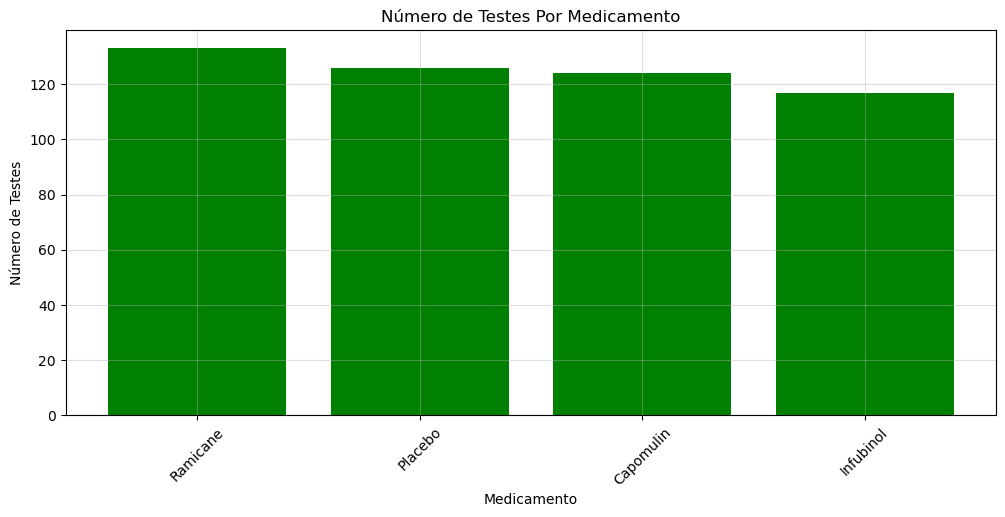

In [24]:
# Número de Testes Por Medicamento

# Plot
plt.figure(figsize = (12, 5)) 
x_axis = df_dsa_final["Medicamento"].value_counts().index.values
y_axis = df_dsa_final["Medicamento"].value_counts().values
plt.bar(x_axis, y_axis, color = "green")
plt.title("Número de Testes Por Medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Número de Testes")
plt.grid(alpha = 0.4)
plt.xticks(rotation = 45)
plt.show()

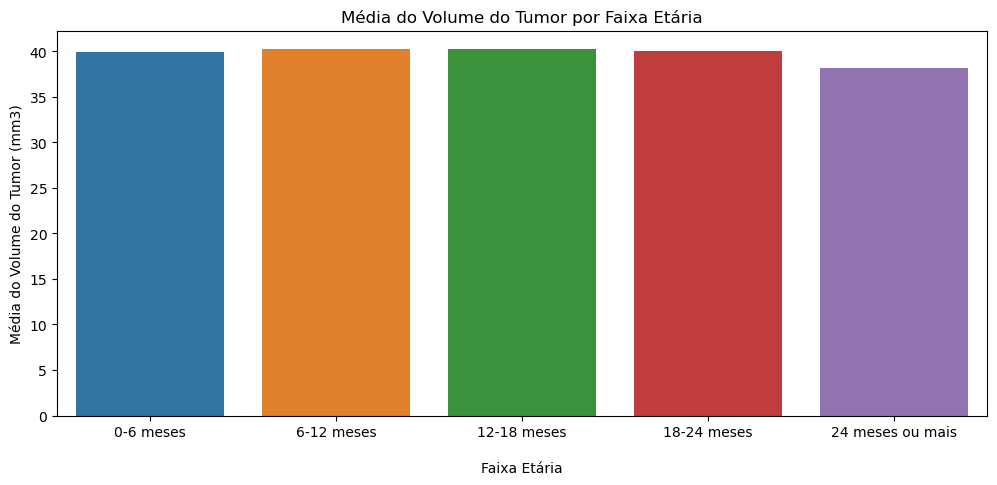

In [25]:
# Média do Volume do Tumor por Faixa Etária

# Definindo faixas etárias
bins = [0, 6, 12, 18, 24, 30]  
labels = ['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses', '24 meses ou mais']

# Divide as faixas
df_dsa_final['faixa_etaria'] = pd.cut(df_dsa_final['Idade_Meses'], 
                                      bins = bins, 
                                      labels = labels, 
                                      right = False)

# Agrupando por 'faixa_etaria' e calculando a média do 'Tumor Volume (mm3)'
media_tumor = df_dsa_final.groupby('faixa_etaria')['Tumor Volume (mm3)'].mean().reset_index()

# Criando o gráfico
import seaborn as sns
plt.figure(figsize = (12, 5)) 
sns.barplot(x = 'faixa_etaria', y = 'Tumor Volume (mm3)', data = media_tumor)
plt.title('Média do Volume do Tumor por Faixa Etária')
plt.xlabel('\nFaixa Etária')
plt.ylabel('Média do Volume do Tumor (mm3)')
plt.show()

## Quartis, Outliers e Boxplots

Quartis são valores que dividem um conjunto de dados em quatro partes iguais. O primeiro quartil (Q1) é o valor que separa os 25% menores dados dos demais, o segundo quartil (Q2) ou mediana divide os dados ao meio, e o terceiro quartil (Q3) separa os 75% menores dados dos 25% maiores.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
Outliers ou valores atípicos são observações que se distanciam significativamente dos outros dados do conjunto. Eles podem ser resultado de variabilidade nos dados ou de erros de medição. São importantes porque podem distorcer estatísticas e proporcionar insights sobre anomalias.

Um boxplot é um método gráfico para representar a distribuição de dados numéricos por meio de quartis. Ele mostra o mínimo, o primeiro quartil (Q1), a mediana (Q2), o terceiro quartil (Q3) e o máximo, com linhas (chamadas de "bigodes" ou whiskers) que se estendem para mostrar a variabilidade fora dos quartis. Outliers são frequentemente indicados como pontos individuais que ficam fora dos "bigodes".

In [26]:
# Nomes das colunas
df_dsa_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos',
       'faixa_etaria'],
      dtype='object')

In [27]:
# Filtra os dados por medicamento
Capomulin_df = df_dsa_final.loc[df_dsa_final["Medicamento"] == "Capomulin",:]
Ramicane_df = df_dsa_final.loc[df_dsa_final["Medicamento"] == "Ramicane", :]
Infubinol_df = df_dsa_final.loc[df_dsa_final["Medicamento"] == "Infubinol", :]
Ceftamin_df = df_dsa_final.loc[df_dsa_final["Medicamento"] == "Ceftamin", :]

In [28]:
Capomulin_df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
11,m002,Capomulin,Feminino,5,15,5,42.618402,0,0-6 meses
18,m003,Capomulin,Feminino,8,19,15,38.578974,0,6-12 meses
24,m004,Capomulin,Masculino,6,28,20,39.716441,2,6-12 meses
28,m005,Capomulin,Masculino,16,27,15,40.130019,2,12-18 meses


In [29]:
# Agrupa pelo 'ID Mouse' e obtém o maior valor (o último tratamento de cada cobaia), filtrando o 'Timepoint'
Capomulin_last = Capomulin_df.groupby('ID Mouse').max()['Timepoint']

In [30]:
Capomulin_last

ID Mouse
m000    15
m002     5
m003    15
m004    20
m005    15
        ..
m094    10
m095    20
m096    20
m097     0
m098    20
Name: Timepoint, Length: 76, dtype: int64

In [31]:
# Converte em dataframe
Capomulin_volume = pd.DataFrame(Capomulin_last)

In [32]:
# Merge com o dataframe original (queremos somente o último timepoint)
Capomulin_merge = pd.merge(Capomulin_volume, Capomulin_df, on = ("ID Mouse", "Timepoint"), how = "left")

In [33]:
Capomulin_merge.head()

,ID Mouse,Timepoint,Medicamento,Sexo,Idade_Meses,Peso (g),Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
0,m000,15,Capomulin,Feminino,21,23,38.578206,2,18-24 meses
1,m002,5,Capomulin,Feminino,5,15,42.618402,0,0-6 meses
2,m003,15,Capomulin,Feminino,8,19,38.578974,0,6-12 meses
3,m004,20,Capomulin,Masculino,6,28,39.716441,2,6-12 meses
4,m005,15,Capomulin,Masculino,16,27,40.130019,2,12-18 meses


In [34]:
# Extrai os tumores
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

In [35]:
# Extrai os quartis
Cap_quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])

In [36]:
# Separa o primeiro e o terceiro quartil
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]

In [37]:
# Calcula o IQR (Intervalo Interquartil)
Cap_iqr = Cap_upperq - Cap_lowerq

In [38]:
# Define limites inferior e superior
Cap_lowerbound = Cap_lowerq - (Cap_iqr * 1.5)
Cap_upperbound = Cap_upperq + (Cap_iqr * 1.5)

In [39]:
print(f"Primeiro Quartil da Medida do Tumor com Capomulin: {Cap_lowerq}")
print(f"Terceiro Quartil da Medida do Tumor com Capomulin: {Cap_upperq}")
print(f"Intervalo Interquartil (IQR): {Cap_iqr}")
print(f"Valores Abaixo de {Cap_lowerbound} podem ser outliers")
print(f"Valores Acima de {Cap_upperbound} podem ser outliers")

Primeiro Quartil da Medida do Tumor com Capomulin: 35.58718855604685
Terceiro Quartil da Medida do Tumor com Capomulin: 41.07860879053021
Intervalo Interquartil (IQR): 5.491420234483364
Valores Abaixo de 27.3500582043218 podem ser outliers
Valores Acima de 49.315739142255254 podem ser outliers


> Vamos agora reproduzir isso para cada medicamento.

In [40]:
# Extrai o último timepoint para cada cobaia
last_timepoint = pd.DataFrame(df_dsa_final.groupby('ID Mouse')['Timepoint'].max().sort_values()) \
                    .reset_index().rename(columns = {'Timepoint': 'max_timepoint'})

In [41]:
last_timepoint.head()

,ID Mouse,max_timepoint
0,m000,20
1,m072,20
2,m071,20
3,m070,20
4,m069,20


In [42]:
# Adiciona o último timepoint como uma coluna no dataframe original
merged_df = pd.merge(df_dsa_final, last_timepoint, on = "ID Mouse")

In [43]:
merged_df.shape

(500, 10)

In [44]:
merged_df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria,max_timepoint
0,m000,Placebo,Masculino,18,21,0,45.780350,2,18-24 meses,20
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,24 meses ou mais,20
2,m000,Ramicane,Feminino,19,23,10,40.827502,1,18-24 meses,20
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses,20
4,m000,Infubinol,Masculino,12,17,20,35.094393,2,12-18 meses,20


In [45]:
# Nomes das colunas
df_dsa_final.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos',
       'faixa_etaria'],
      dtype='object')

In [46]:
# Lista para o volume do tumor
tumor_volume = []

In [47]:
# Lista de tratamentos
lista_medicamentos = ["Capomulin", "Ramicane", "Infubinol", "Placebo"]

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
### Pergunta 1 - Há Outliers em Cada Tratamento?

In [48]:
print(f"\nRelatório Estatístico de Outliers")

# Loop através de cada medicamento na lista de tratamentos
for medicamento in lista_medicamentos:

    # Filtra o DataFrame para obter dados apenas do medicamento atual na iteração
    dsa_dados = merged_df.loc[merged_df["Medicamento"] == medicamento]
    
    # Localiza os dados do volume final do tumor no último ponto de tempo registrado para o medicamento
    final_volume = dsa_dados.loc[dsa_dados["Timepoint"] == dsa_dados["max_timepoint"]]
    
    # Seleciona a coluna de volume do tumor dos dados filtrados
    final_volumes = final_volume["Tumor Volume (mm3)"]
    
    # Adiciona os volumes finais de tumor à lista de volumes de tumor
    tumor_volume.append(final_volumes)
        
    # Calcula os quartis para os volumes finais do tumor
    quartiles = final_volumes.quantile([0.25,.5,0.75])

    # Atribui o primeiro quartil à variável lowerq
    lowerq = quartiles[0.25]
    
    # Atribui o terceiro quartil à variável upperq
    upperq = quartiles[0.75]
    
    # Calcula o intervalo interquartil (IQR)
    iqr = upperq - lowerq
    
    # Calcula o limite inferior para detecção de outliers
    lower_bound =  lowerq - (1.5 * iqr)
    
    # Calcula o limite superior para detecção de outliers
    upper_bound = upperq +(1.5 * iqr)
    
    # Conta os outliers com base nos limites definidos
    outliers = final_volumes[(final_volume["Tumor Volume (mm3)"] <= lower_bound) | \
                             (final_volume["Tumor Volume (mm3)"] >= upper_bound)].count()

    # Imprime o resumo estatístico dos outliers para cada medicamento
    print(f"\nIQR Para {medicamento}: {iqr}")
    print(f"Limite Inferior Para {medicamento}: {lower_bound}")
    print(f"Limite Superior Para {medicamento}: {upper_bound}")
    print(f"Medicamento: {medicamento} -> Número de outliers: {outliers}")


Relatório Estatístico de Outliers

IQR Para Capomulin: 4.852178469471447
Limite Inferior Para Capomulin: 25.767389137683136
Limite Superior Para Capomulin: 45.17610301556893
Medicamento: Capomulin -> Número de outliers: 0

IQR Para Ramicane: 5.003897167188235
Limite Inferior Para Ramicane: 26.055360480530023
Limite Superior Para Ramicane: 46.07094914928297
Medicamento: Ramicane -> Número de outliers: 0

IQR Para Infubinol: 3.8793474601479048
Limite Inferior Para Infubinol: 26.74425645494983
Limite Superior Para Infubinol: 42.26164629554145
Medicamento: Infubinol -> Número de outliers: 0

IQR Para Placebo: 5.16298824225909
Limite Inferior Para Placebo: 24.757630535846673
Limite Superior Para Placebo: 45.40958350488303
Medicamento: Placebo -> Número de outliers: 0


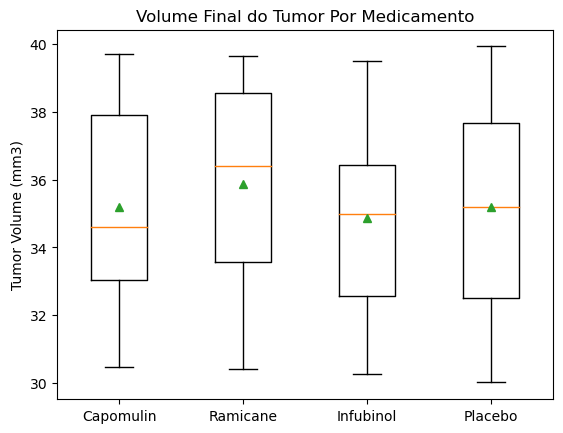

In [49]:
# Boxplot
format = dict(marker = "o")
plt.boxplot(tumor_volume, flierprops = format, showmeans = True)
plt.title("Volume Final do Tumor Por Medicamento")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Placebo"])
plt.show()

In [50]:
df_dsa_final.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
0,m000,Placebo,Masculino,18,21,0,45.780350,2,18-24 meses
1,m000,Ramicane,Masculino,24,17,5,42.728114,0,24 meses ou mais
2,m000,Ramicane,Feminino,19,23,10,40.827502,1,18-24 meses
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
4,m000,Infubinol,Masculino,12,17,20,35.094393,2,12-18 meses


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
### Pergunta 2 - Com o Uso de Medicamentos Há Efeito no Volume do Tumor ao Longo do Tempo?

In [51]:
# Extrai os dados de uma cobaia
tratamento_mouse = df_dsa_final.loc[df_dsa_final["ID Mouse"] == "m000"]

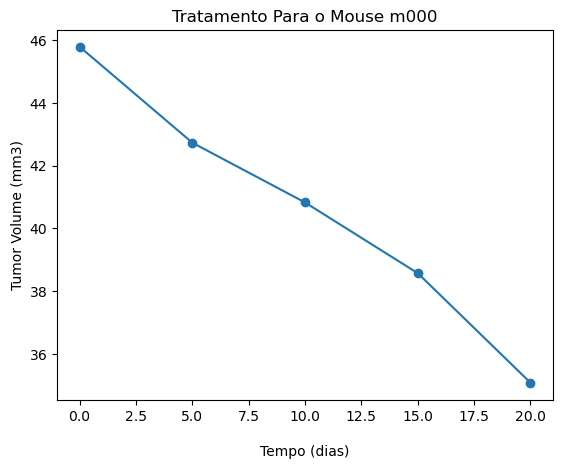

In [52]:
# Plot
plt.plot(tratamento_mouse['Timepoint'], tratamento_mouse["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("\nTempo (dias)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tratamento Para o Mouse m000")
plt.show()

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
### Pergunta 3 - Para Um dos Medicamentos Qual a Relação Entre Peso da Cobaia e Tamanho do Tumor?

In [53]:
# Filtra os dados
capomulin_treatment = df_dsa_final.loc[df_dsa_final["Medicamento"] == "Capomulin"]

In [54]:
capomulin_treatment.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
11,m002,Capomulin,Feminino,5,15,5,42.618402,0,0-6 meses
18,m003,Capomulin,Feminino,8,19,15,38.578974,0,6-12 meses
24,m004,Capomulin,Masculino,6,28,20,39.716441,2,6-12 meses
28,m005,Capomulin,Masculino,16,27,15,40.130019,2,12-18 meses


In [55]:
capomulin_treatment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 3 to 494
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Mouse             124 non-null    object  
 1   Medicamento          124 non-null    object  
 2   Sexo                 124 non-null    object  
 3   Idade_Meses          124 non-null    int64   
 4   Peso (g)             124 non-null    int64   
 5   Timepoint            124 non-null    int64   
 6   Tumor Volume (mm3)   124 non-null    float64 
 7   Sitios Metastáticos  124 non-null    int64   
 8   faixa_etaria         124 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 9.0+ KB


In [56]:
# Ao calcular a média, especificamos apenas as colunas numéricas
avg_tumor_volume = capomulin_treatment.groupby('ID Mouse')[['Idade_Meses', 
                                                            'Peso (g)', 
                                                            'Timepoint', 
                                                            'Tumor Volume (mm3)', 
                                                            'Sitios Metastáticos']].mean()

In [57]:
avg_tumor_volume.head()

,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
ID Mouse,,,,,
m000,21.0,23.0,15.0,38.578206,2.0
m002,5.0,15.0,5.0,42.618402,0.0
m003,8.0,19.0,15.0,38.578974,0.0
m004,6.0,28.0,20.0,39.716441,2.0
m005,16.0,27.0,15.0,40.130019,2.0


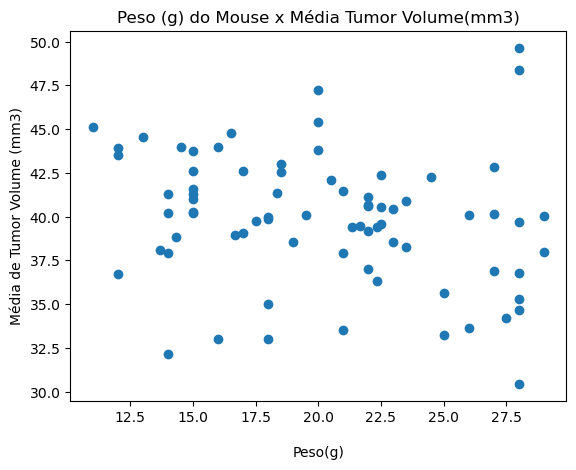

In [58]:
# Scatter Plot
x_values = avg_tumor_volume["Peso (g)"]
y_values = avg_tumor_volume["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Peso (g) do Mouse x Média Tumor Volume(mm3)")
plt.xlabel("\nPeso(g)")
plt.ylabel("Média de Tumor Volume (mm3)")
plt.show()

In [59]:
# Calcula a correlação
correlation_model = st.pearsonr(avg_tumor_volume["Peso (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
print(f"A correlação entre Peso (g) e Tumor Volume (mm3) é de {round(correlation_model[0],2)}")

A correlação entre Peso (g) e Tumor Volume (mm3) é de -0.22


## Quantificando e Prevendo a Relação Através de Regressão Linear

Regressão Linear é um método estatístico usado para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. O objetivo é encontrar uma linha reta que melhor se ajuste aos dados, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela linha de regressão. Em outras palavras, busca-se descrever como a variável de interesse responde à mudança das outras variáveis.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [60]:
# Cria o modelo de regressão
modelo = st.linregress(avg_tumor_volume["Peso (g)"], avg_tumor_volume["Tumor Volume (mm3)"])

In [61]:
modelo.intercept

43.1616906149073

In [62]:
modelo.slope

-0.16303360099718336

Fórmula da Regressão Linear Simples

y = β0 + β1x

- y é a variável dependente que estamos tentando prever ou explicar.
- x é a variável independente usada para prever y.
- 𝛽0 é o intercepto da reta, representando o valor esperado de 𝑦 quando x é igual a zero.
- 𝛽1 é o coeficiente da variável independente (também chamado slope), indicando a mudança esperada em y para um aumento de uma unidade em x.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

In [63]:
# Cria a fórmula de regressão com os coeficientes encontrados
modelo_dsa = modelo.intercept + modelo.slope * avg_tumor_volume["Peso (g)"]

In [64]:
# Calcula a linha de regressão
line_equation = f"y={round(modelo.slope, 2)}x + {round(modelo.intercept, 2)}"

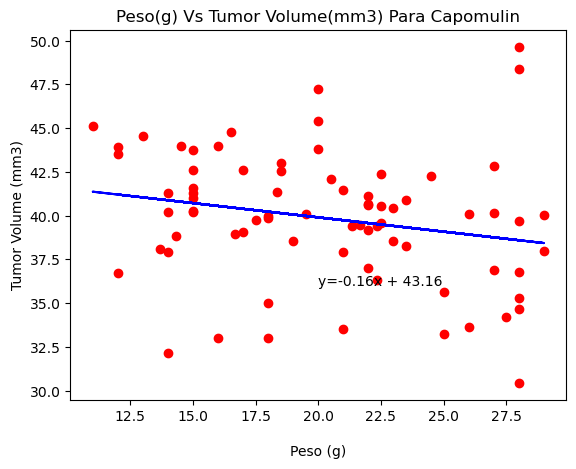

In [65]:
# Plot
plt.scatter(avg_tumor_volume["Peso (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color = "r")
plt.plot(avg_tumor_volume["Peso (g)"], modelo_dsa, color = "blue")
plt.xlabel("\nPeso (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Peso(g) Vs Tumor Volume(mm3) Para Capomulin")
plt.annotate(line_equation, (20,36))
plt.show();

Há uma relação negativa entre as variáveis. Isso significa que à medida que o volume do tumor diminui, aumenta o peso da cobaia (mouse). Ou seja, quanto menor o tumor, maior o potencial de ganho de peso da cobaia, possivelmente devido à melhora da saúde ou outras condições relacionadas.

Como será que o ChatGPT se comporta ao fazer uma análise como esta que fizemos neste projeto? 

É o que iremos descobrir no próximo capítulo. Até lá.

In [66]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [67]:
#%watermark -v -m

In [68]:
#%watermark --iversions

# Fim